<a href="https://colab.research.google.com/github/MartinOcharo/KODAMA/blob/main/Sentiment_Analysis_On_Covid_19_Tweets_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries #

In [ ]:
import nltk                      # For Natural Language Processing
import spacy                     # Large volumes of text processing
import csv                       # Since we are working on a csv file
import re                        # Information Retrieval from text
import os                        # Tabular Presentation of data
import string                    # For Strings Manipulation
import pickle                    # save our model
import pandas as pd              # For dataframe manipulation
import numpy as np               # Multi-dimensional arrays
import TextBlob

from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection,metrics,feature_extraction, preprocessing,linear_model

from collections import Counter    # Word Frequency
from PIL import Image


from matplotlib import pyplot as plt # For visualization
from matplotlib import ticker        # Takes input and return a string
import seaborn as sns                # For visualization
from wordcloud import ImageColorGenerator, WordCloud


In [ ]:
#Load our dataet
df = pd.read_csv('covid19_tweets.csv')
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [ ]:
#From our problem statement it is ideal to use the text column
tweet_en = df['text']
tweet_en

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

   # Data Preprocessing #

In [ ]:
#Remove URLS
tweet_en_lr = tweet_en.apply(lambda x: re.sub(r"https\S+", "", str(x)))
tweet_en_lr

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104           2020! The year of insanity! Lol! #COVID19 
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

In [ ]:
#Conversion to lowercase
tweet_en_lr_lc = tweet_en_lr.apply(lambda x: x.lower())
tweet_en_lr_lc

0         if i smelled the scent of hand sanitizers toda...
1         hey @yankees @yankeespr and @mlb - wouldn't it...
2         @diane3443 @wdunlap @realdonaldtrump trump nev...
3         @brookbanktv the one gift #covid19 has give me...
4         25 july : media bulletin on novel #coronavirus...
                                ...                        
179103    thanks @iamohmai for nominating me for the @wh...
179104           2020! the year of insanity! lol! #covid19 
179105    @ctvnews a powerful painting by juan lucena. i...
179106    more than 1,200 students test positive for #co...
179107    i stop when i see a stop\n\n@sabcnews\n@izinda...
Name: text, Length: 179108, dtype: object

In [ ]:
#Remove stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19'])

tweet_en_lr_lc_pr_sr = tweet_en_lr_lc.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
tweet_en_lr_lc_pr_sr

0         smelled scent hand sanitizers today someone pa...
1         hey @yankees @yankeespr @mlb - made sense play...
2         @diane3443 @wdunlap @realdonaldtrump trump nev...
3         @brookbanktv one gift give appreciation simple...
4         25 july : media bulletin novel #coronavirusupd...
                                ...                        
179103    thanks @iamohmai nominating @who #wearamask ch...
179104                            2020! year insanity! lol!
179105    @ctvnews powerful painting juan lucena. tribut...
179106    1,200 students test positive major university ...
179107    stop see stop @sabcnews @izindabanews24 @daily...
Name: text, Length: 179108, dtype: object

In [ ]:

#Concatenating all tweets into a list of words
word_list = [word for line in tweet_en_lr_lc_pr_sr for word in line.split()]
word_list[:1000]


['smelled',
 'scent',
 'hand',
 'sanitizers',
 'today',
 'someone',
 'past,',
 'would',
 'think',
 'intoxicated',
 'that…',
 'hey',
 '@yankees',
 '@yankeespr',
 '@mlb',
 '-',
 'made',
 'sense',
 'players',
 'pay',
 'respects',
 'a…',
 '@diane3443',
 '@wdunlap',
 '@realdonaldtrump',
 'trump',
 'never',
 'claimed',
 'hoax.',
 'claim',
 'effort',
 'to…',
 '@brookbanktv',
 'one',
 'gift',
 'give',
 'appreciation',
 'simple',
 'things',
 'always',
 'around',
 'me…',
 '25',
 'july',
 ':',
 'media',
 'bulletin',
 'novel',
 '#coronavirusupdates',
 '@kansalrohit69',
 '@drsyedsehrish',
 '@airnewsalerts',
 '@ani…',
 'deaths',
 'continue',
 'rise.',
 'almost',
 'bad',
 'ever',
 'was.',
 'politicians',
 'businesses',
 'want…',
 'change',
 'work',
 'general',
 '(and',
 'recruiting,',
 'specifically)',
 'via/',
 '@proactivetalent',
 '#recruiting…',
 'wear',
 'face',
 'coverings',
 'shopping',
 '-',
 'includes',
 'visit',
 'local',
 'community',
 'pharmacy…',
 'praying',
 'good',
 'health',
 'recovery

In [ ]:
# Checking most common and frequent words
from collections import Counter
count_all_words = Counter(word_list)
count_all_words.most_common(1000)

[('cases', 14693),
 ('new', 14346),
 ('&amp;', 11859),
 ('-', 10005),
 ('people', 8293),
 ('covid-19', 7345),
 ('deaths', 5628),
 ('us', 5234),
 ('total', 4555),
 ('one', 4502),
 ('health', 4473),
 ('positive', 4316),
 ('get', 4315),
 ('pandemic', 4299),
 ('need', 4105),
 ('#covid19.', 3903),
 ('like', 3822),
 ('|', 3775),
 ('help', 3592),
 ('#covid19…', 3539),
 ('last', 3487),
 ('@realdonaldtrump', 3393),
 ('many', 3164),
 ('due', 2870),
 ('#covid19,', 2849),
 ('.', 2827),
 ('time', 2793),
 ('reported', 2790),
 ('first', 2766),
 ('know', 2747),
 ('covid', 2733),
 ('still', 2629),
 ('day', 2604),
 ('even', 2595),
 ('spread', 2583),
 ('number', 2573),
 ('mask', 2511),
 ('india', 2454),
 ('world', 2448),
 ('take', 2389),
 ('tested', 2387),
 (':', 2333),
 ('back', 2327),
 ('today', 2321),
 ('would', 2313),
 ('please', 2291),
 ('the…', 2279),
 ('going', 2277),
 ('see', 2271),
 ('august', 2264),
 ('good', 2246),
 ('t…', 2238),
 ('global', 2221),
 ('news', 2203),
 ('death', 2197),
 ('a…', 21

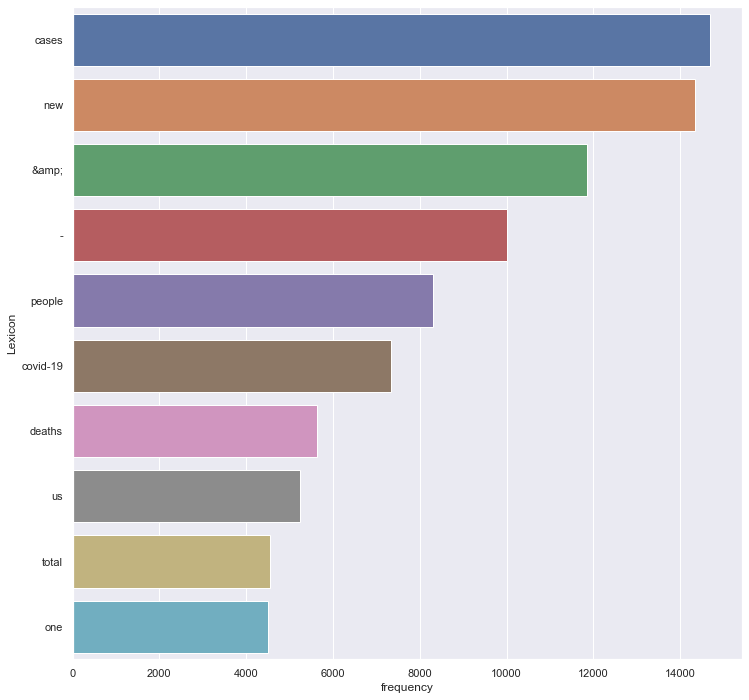

In [ ]:
#calculating word frequency
sns.set(style="darkgrid")
counts = Counter(word_list).most_common(10)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['Lexicon', 'frequency']

fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="Lexicon", x='frequency', ax = ax, data=counts_df)
plt.savefig('wordcount_bar.png')

# VADER Algorithm  #

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

scores = tweet_en_lr_lc_pr_sr.apply(lambda review: sid.polarity_scores(review))

scores

0         {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...
1         {'neg': 0.12, 'neu': 0.684, 'pos': 0.197, 'com...
2         {'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp...
3         {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'comp...
4         {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...
                                ...                        
179103    {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...
179104    {'neg': 0.488, 'neu': 0.213, 'pos': 0.299, 'co...
179105    {'neg': 0.234, 'neu': 0.584, 'pos': 0.182, 'co...
179106    {'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou...
179107    {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'comp...
Name: text, Length: 179108, dtype: object

In [ ]:
compound  = scores.apply(lambda score_dict: score_dict['compound'])

compound

0         0.4939
1         0.2263
2         0.2057
3         0.7351
4         0.3182
           ...  
179103    0.4939
179104   -0.4168
179105   -0.2023
179106    0.5574
179107   -0.5267
Name: text, Length: 179108, dtype: float64

In [ ]:
def Sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"

Sentiment = compound.apply(Sentimnt)
Sentiment

0         Positive
1         Positive
2         Positive
3         Positive
4         Positive
            ...   
179103    Positive
179104    Negative
179105    Negative
179106    Positive
179107    Negative
Name: text, Length: 179108, dtype: object

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sent_scores_df['Val'] = sent_scores_df['compound'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x<= -0.05 else 'Neutral'))
sent_scores_df.head(179108)

,neg,neu,pos,compound,Val
0,0.000,0.758,0.242,0.4939,Positive
1,0.110,0.709,0.181,0.2263,Positive
2,0.000,0.832,0.168,0.2057,Positive
3,0.000,0.563,0.437,0.7351,Positive
4,0.000,0.813,0.187,0.3182,Positive
...,...,...,...,...,...
179103,0.000,0.625,0.375,0.4939,Positive
179104,0.488,0.213,0.299,-0.4168,Negative
179105,0.234,0.584,0.182,-0.2023,Negative
179106,0.000,0.690,0.310,0.5574,Positive


# Visualization  #

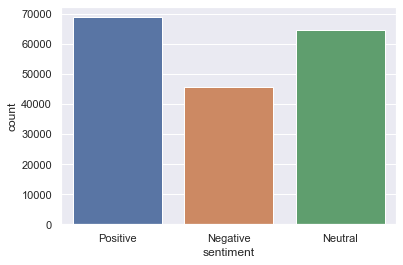

In [ ]:
sent_counts = pd.DataFrame.from_dict(Counter(sent_scores_df['Val']), orient = 'index').reset_index()
sent_counts.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_counts)
plt.savefig('sentiment.png')

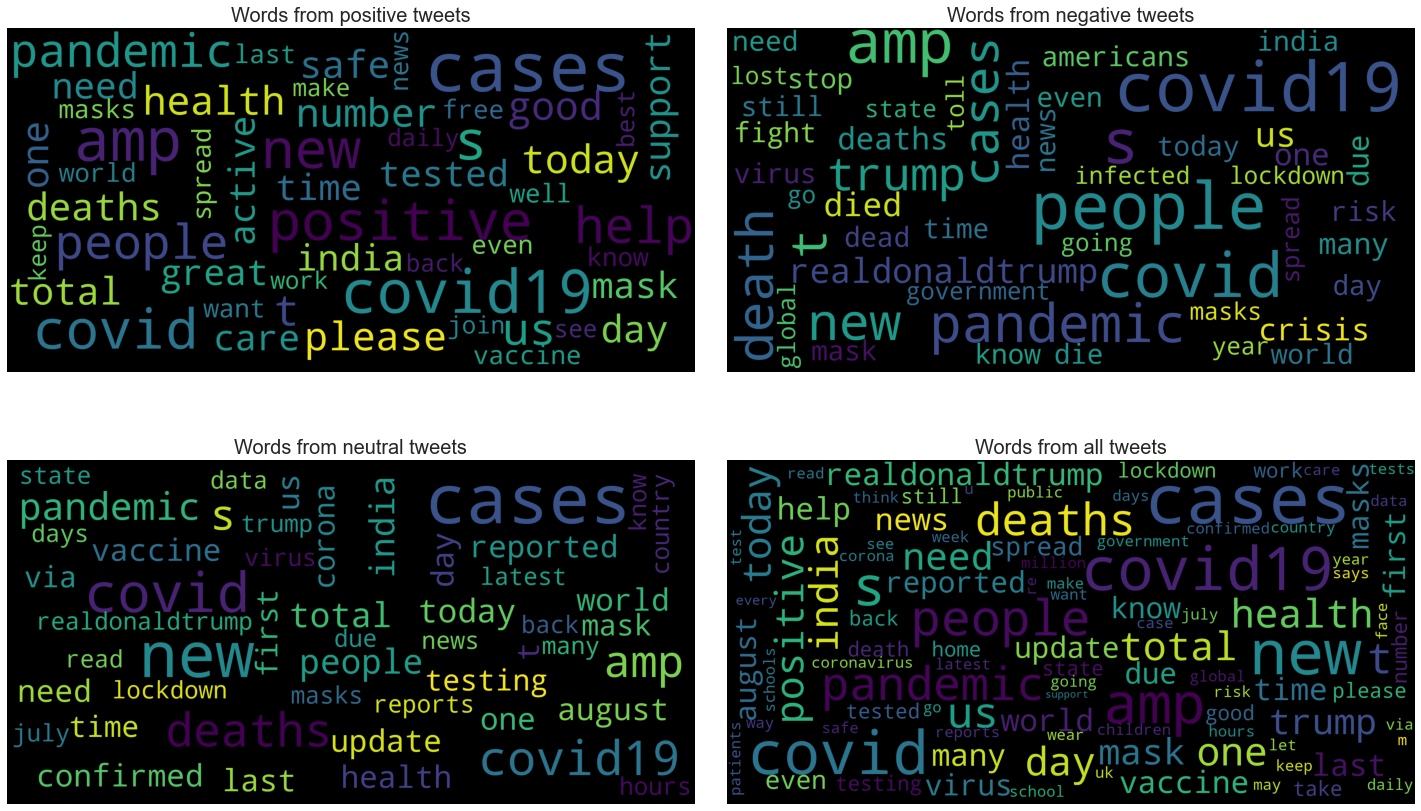

In [ ]:
polar_tweets_df = pd.DataFrame()
polar_tweets_df['tweet'] = tweet_en_lr_lc_pr_sr
polar_tweets_df['polarity'] = sent_scores_df['Val']

Positive = polar_tweets_df[polar_tweets_df['polarity'] == 'Positive']['tweet']
Negative = polar_tweets_df[polar_tweets_df['polarity'] == 'Negative']['tweet']
Neutral = polar_tweets_df[polar_tweets_df['polarity'] == 'Neutral']['tweet']

positive_list = [word for line in Positive for word in line.split()]
negative_list = [word for line in Negative for word in line.split()]
neutral_list = [word for line in Neutral for word in line.split()]

positive_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(positive_list))

negative_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(negative_list))

neutral_cloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral_list))


fig, axs = plt.subplots(2, 2, figsize = (20, 12))
# fig.suptitle('Clouds of polar words', fontsize = 30)
fig.tight_layout(pad = 0)

axs[0, 0].imshow(positive_cloud)
axs[0, 0].set_title('Words from positive tweets', fontsize = 20)
axs[0, 0].axis('off')
# axs[0, 0].tight_layout(pad = 1)

axs[0, 1].imshow(negative_cloud)
axs[0, 1].set_title('Words from negative tweets', fontsize = 20)
axs[0, 1].axis('off')
# axs[0, 1].tight_layout(pad = 1)

axs[1, 0].imshow(neutral_cloud)
axs[1, 0].set_title('Words from neutral tweets', fontsize = 20)
axs[1, 0].axis('off')
# axs[1, 0].tight_layout(pad = 1)

axs[1, 1].imshow(wordcloud)
axs[1, 1].set_title('Words from all tweets', fontsize = 20)
axs[1, 1].axis('off')
# axs[1, 0].tight_layout(pad = 1)
plt.savefig('joint_cloud.png')

In [ ]:
#Emolex
from nrclex import NRCLex
def emotion(x):
    tweet = NRCLex(x)
    if tweet.top_emotions[0][1] == 0.0:
        return "No emotion"
    else:
        return tweet.top_emotions[0][0]
Emotion = tweet_en_lr_lc_pr_sr.apply(emotion)
Emotion

0           negative
1           positive
2           surprise
3           positive
4         No emotion
             ...    
179103          fear
179104          fear
179105      positive
179106      positive
179107    No emotion
Name: text, Length: 179108, dtype: object

In [ ]:
                    #THE END FOR NOW#